In [1]:
# Load modules
%matplotlib inline
import netCDF4 as nc # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections

In [2]:
file_mask=nc.Dataset('/g/data3/hh5/tmp/cosima/mom01v5/KDS75_WOA13/output031/ocean.nc')
tmp=file_mask.variables['salt'][0,:,:,:]
file_mask.close()

In [6]:
file_obs = nc.MFDataset('/g/data3/hh5/tmp/cosima/woa13/01/output000/woa13_ts_*_mom01.nc')
salt_obs=file_obs.variables['salt'][:]
yt_ocean=file_obs.variables['GRID_Y_T'][:]
st_ocean=file_obs.variables['ZT'][:]
# annual mean
t_salt_obs = np.ma.mean(salt_obs,axis=0)
# mask
t_salt_obs = np.ma.masked_where(tmp<-1e10,t_salt_obs)
# zonal mean
m_salt_obs = np.ma.mean(t_salt_obs,axis=2)
m_salt_obs.shape
file_obs(close)

MemoryError: 

In [7]:
file_old=nc.MFDataset('/g/data3/hh5/tmp/cosima/mom01v5/KDS75_WOA13/output03[1-3]/ocean.nc')
salt_old=file_old.variables['salt'][:]
t_salt_old = np.ma.mean(salt_old, axis=0)
t_salt_old = np.ma.masked_where(tmp<-1e10,t_salt_old)
m_salt_old=np.ma.mean(t_salt_old,axis=2)
diff_salt_old = m_salt_old-m_salt_obs
m_salt_old.shape
file_old(close)

MemoryError: 

In [6]:
file_new=nc.MFDataset('/g/data3/hh5/tmp/cosima/mom01v5/KDS75_newbathy_JRA/output01[4-6]/ocean.nc')
salt_new=file_new.variables['salt'][:]
t_salt_new = np.ma.mean(salt_new, axis=0)
t_salt_new = np.ma.masked_where(tmp<-1e10,t_salt_new)
m_salt_new=np.ma.mean(t_salt_new,axis=2)
diff_salt_new = m_salt_new-m_salt_obs
m_salt_new.shape
file_new(close)

(75, 2700)

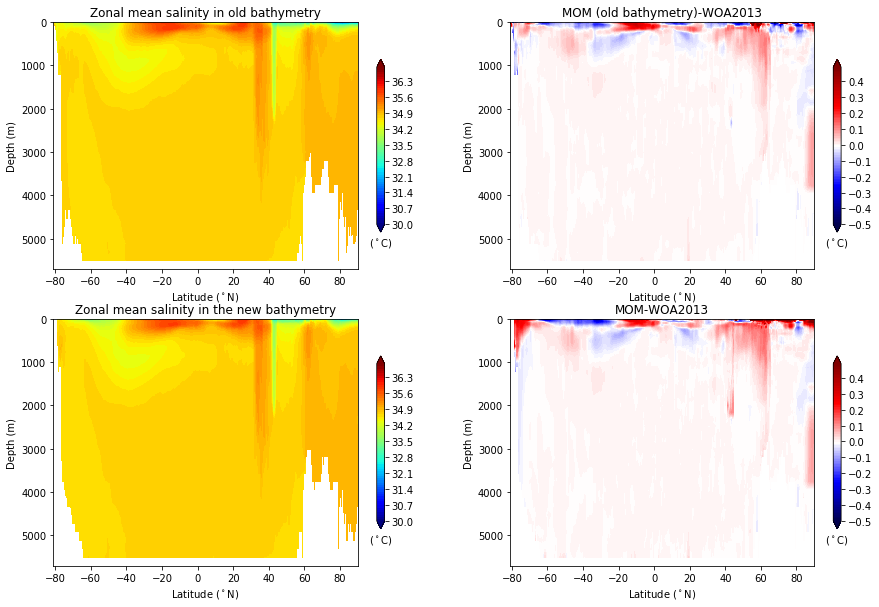

In [7]:
fig,ax=plt.subplots(2,2,figsize=(15,10))
#subplots_adjust(hspace=0.35)
# WOA13
#zavgt=np.ma.mean(t_an,axis=2)
plt.subplot(2,2,1)
clev = np.arange(30,37,0.1)
plt.contourf(yt_ocean,st_ocean,m_salt_old,cmap=plt.cm.jet,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('($^\circ$C)')
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.title('Zonal mean salinity in old bathymetry')

# WOA13 for initial
plt.subplot(2,2,2)
clev = np.arange(-0.5,0.5,0.01)
plt.contourf(yt_ocean,st_ocean,diff_salt_old,cmap=plt.cm.seismic,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('($^\circ$C)')
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.title('MOM (old bathymetry)-WOA2013')

# mom01_WOA13
plt.subplot(2,2,3)
clev = np.arange(30,37,0.1)
plt.contourf(yt_ocean,st_ocean,m_salt_new,cmap=plt.cm.jet,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('($^\circ$C)')
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.title('Zonal mean salinity in the new bathymetry')

# mom01_WOA13-WOA13
########## for 1D lat/long coords, can change degree of kx for improved fit if needed:
#from scipy.interpolate import RectBivariateSpline
#f = RectBivariateSpline(zt,lat,zavgt,kx=1,ky=1)
#woa_zavg75_interp = f(st_ocean,yt_ocean)
## I found I needed this to mask a bunch of NaNs after:
#woa_zavg75_interp  = np.ma.masked_invalid(woa_zavg75_interp)

plt.subplot(2,2,4)
clev = np.arange(-0.5,0.5,0.01)
plt.contourf(yt_ocean,st_ocean,diff_salt_new,cmap=plt.cm.seismic,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('($^\circ$C)')
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.title('MOM-WOA2013')

#ax[-1,-1].axis('off')
plt.savefig('zonal_mean_salinity.png')